In [1]:
#import initial required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load/Read the train and test datasets
train = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

In [3]:
#inspecting our training data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
#Check for null values
train.isnull()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27451,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27452,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27453,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
labels = train['label'].values

In [6]:
#view the unique labels, 24 in total
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<Axes: ylabel='count'>

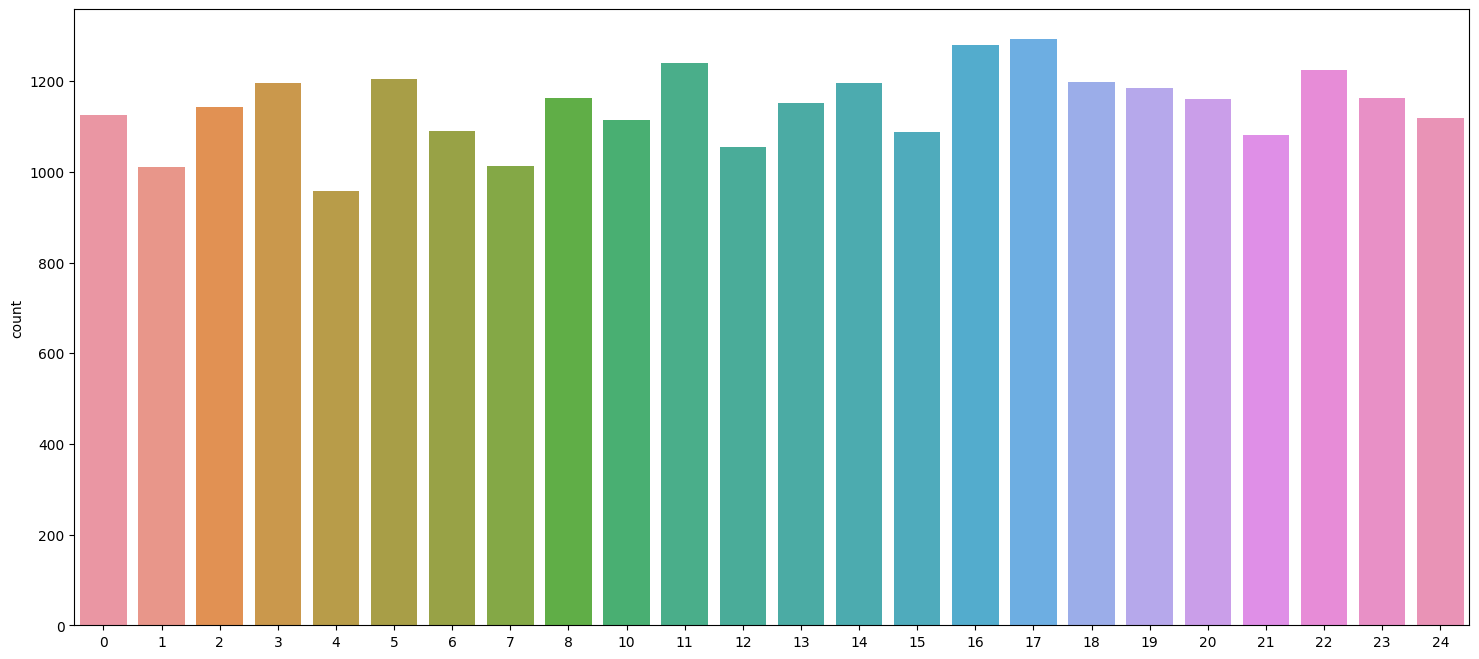

In [7]:
plt.figure(figsize = (18,8))
sns.countplot(x=labels)

In [8]:
train.drop('label', axis = 1, inplace = True)

In [9]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [10]:
#hot one encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [11]:
#View our labels
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


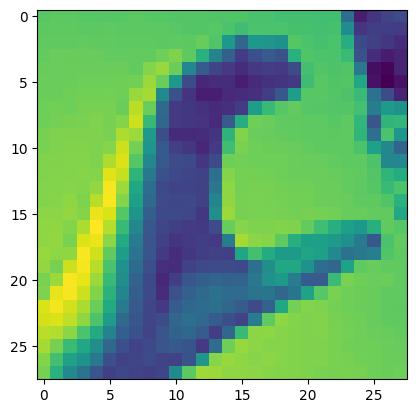

In [12]:
#Viewing an image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28, 28))

In [13]:
#split our data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)#

In [14]:
#start loading our tensorflow modules and define our batch size etc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

2023-03-10 01:15:01.022944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
#scaling our images
x_train = x_train / 255
x_test = x_test / 255

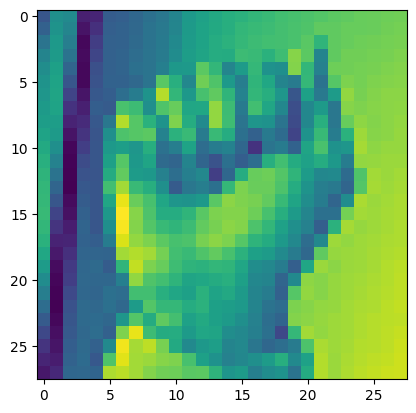

In [16]:
#Reshape them into size required by TensorFlow and Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28, 28))

In [17]:
#Create our Convolutional Neural Network model using Keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K, models, layers, utils
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [18]:
#Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [19]:
#Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [20]:
#Train our model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 7s 43ms/step - loss: 2.5086 - accuracy: 0.2307 - val_loss: 1.4707 - val_accuracy: 0.5287
Epoch 2/10
151/151 [==============================] - 6s 42ms/step - loss: 1.1157 - accuracy: 0.6220 - val_loss: 0.6757 - val_accuracy: 0.7867
Epoch 3/10
151/151 [==============================] - 7s 44ms/step - loss: 0.6354 - accuracy: 0.7810 - val_loss: 0.3772 - val_accuracy: 0.8872
Epoch 4/10
151/151 [==============================] - 7s 47ms/step - loss: 0.3906 - accuracy: 0.8719 - val_loss: 0.2809 - val_accuracy: 0.9117
Epoch 5/10
151/151 [==============================] - 7s 46ms/step - loss: 0.2633 - accuracy: 0.9129 - val_loss: 0.1546 - val_accuracy: 0.9571
Epoch 6/10
151/151 [==============================] - 7s 47ms/step - loss: 0.1696 - accuracy: 0.9465 - val_loss: 0.0837 - val_accuracy: 0.9822
Epoch 7/10
151/151 [==============================] - 7s 47ms/step - loss: 0.1096 - accuracy: 0.9687 - val_loss: 0.0695 - val_accuracy: 0.9822

In [21]:
#save our model
model.save("CNN_Model.h5")
print("Model has been saved successfully")

Model has been saved successfully


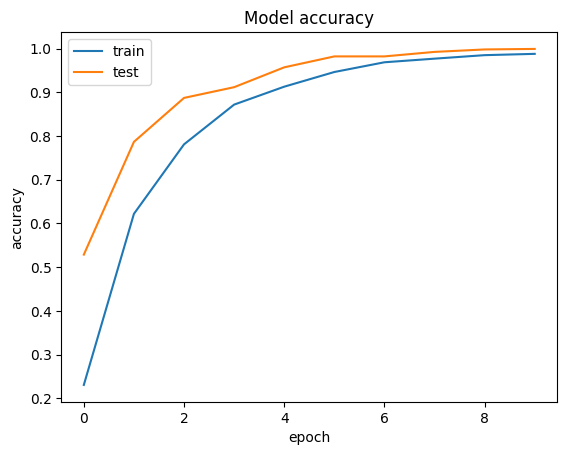

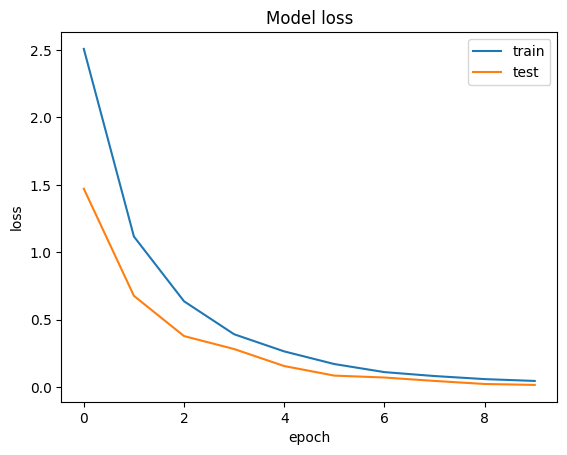

In [22]:
#View our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

plt.show()

In [23]:
#Reshape our test data so that we can evaluate it's performance on unseen data
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

225/225 [==============================] - 2s 8ms/step


In [24]:
#Get our accuracy score
from sklearn.metrics import accuracy_score

print("Test Accuracy: {:.2f}%".format(accuracy_score(test_labels, y_pred.round()) * 100))
accuracy_score(test_labels, y_pred.round())

Test Accuracy: 84.19%


0.8418851087562744